In [170]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [264]:
df = pd.read_csv("Ecommerce - UK Retailer.csv",encoding = 'ISO-8859-1')

In [265]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [266]:
df.shape

(541909, 8)

In [267]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
# From above box plot, we can see there are outliers in Quantity. so lets remove and plot again
# df.drop(df.loc[df['Quantity'] > 20000].index,inplace=True)
# df[['UnitPrice','Quantity','CustomerID']].plot.box()

# 1. Perform Basic EDA 
a. Boxplot – All Numeric Variables 

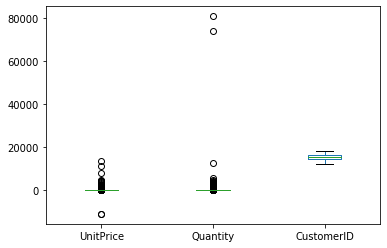

In [157]:
df[['UnitPrice','Quantity','CustomerID']].plot.box()
plt.show()

b. Histogram – All Numeric Variables 

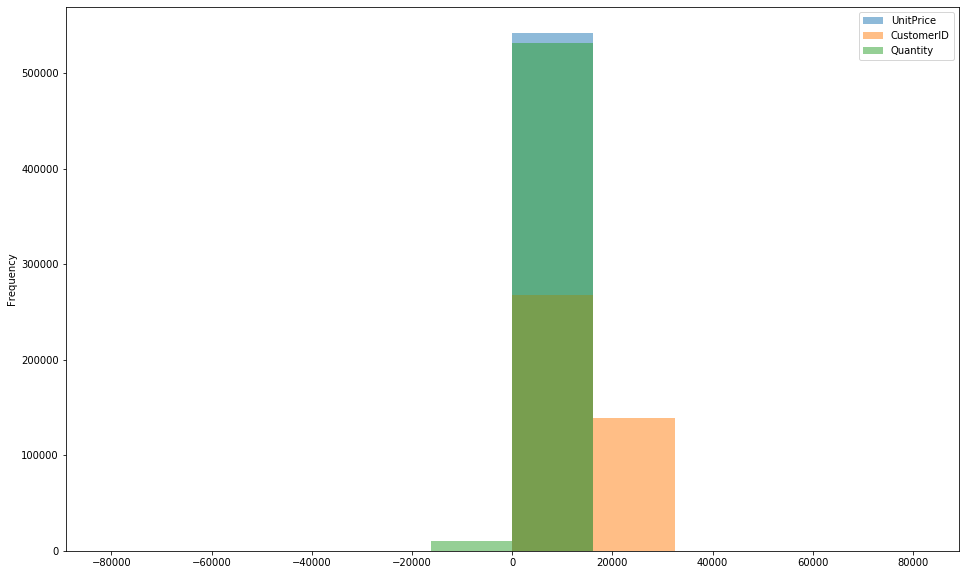

In [7]:
df[['UnitPrice','CustomerID','Quantity']].plot.hist(alpha=0.5, figsize=(16, 10))

c. Distribution Plot – All Numeric Variables 

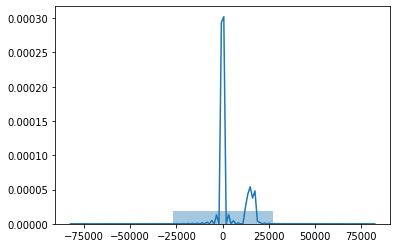

In [8]:
sns.distplot(df[['UnitPrice','CustomerID','Quantity']],bins=3)

d. Aggregation for all numerical Columns 

In [ ]:
df.describe()

e. Unique Values across all columns 

In [9]:
df1 = dict(zip([i for i in df.columns] , [pd.DataFrame(df[i].unique(), columns=[i]) for i in df.columns]))
df1

{'InvoiceNo':       InvoiceNo
 0        536365
 1        536366
 2        536367
 3        536368
 4        536369
 ...         ...
 25895    581583
 25896    581584
 25897    581585
 25898    581586
 25899    581587
 
 [25900 rows x 1 columns],
 'StockCode':      StockCode
 0       85123A
 1        71053
 2       84406B
 3       84029G
 4       84029E
 ...        ...
 4065    85179a
 4066     23617
 4067    90214U
 4068    47591b
 4069     23843
 
 [4070 rows x 1 columns],
 'Description':                               Description
 0      WHITE HANGING HEART T-LIGHT HOLDER
 1                     WHITE METAL LANTERN
 2          CREAM CUPID HEARTS COAT HANGER
 3     KNITTED UNION FLAG HOT WATER BOTTLE
 4          RED WOOLLY HOTTIE WHITE HEART.
 ...                                   ...
 4219                      ????damages????
 4220                             mixed up
 4221                                 lost
 4222   CREAM HANGING HEART T-LIGHT HOLDER
 4223          PAPER CRAFT , LITT

f. Duplicate values across all columns 

In [10]:
duplicate = df[df.duplicated(keep='first')] 
duplicate

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,12/1/2010 11:49,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,12/9/2011 11:34,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,12/9/2011 11:34,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,12/9/2011 11:34,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,12/9/2011 11:34,2.10,14446.0,United Kingdom


g. Correlation – Heatmap - All Numeric Variables 

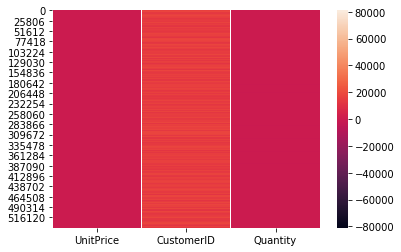

In [11]:
sns.heatmap(df[['UnitPrice','CustomerID','Quantity']])
plt.show()

In [12]:
df[['UnitPrice','CustomerID','Quantity']].corr()

,UnitPrice,CustomerID,Quantity
UnitPrice,1.000000,-0.00456,-0.001235
CustomerID,-0.004560,1.00000,-0.003600
Quantity,-0.001235,-0.00360,1.000000


h. Regression Plot - All Numeric Variables 

In [ ]:
sns.regplot(x=df['UnitPrice'],y=df['CustomerID'])
plt.show()

i. Bar Plot – Every Categorical Variable vs every Numerical Variable 

In [ ]:
df[['UnitPrice','CustomerID','Quantity']].plot.bar()

j. Pair plot - All Numeric Variables 

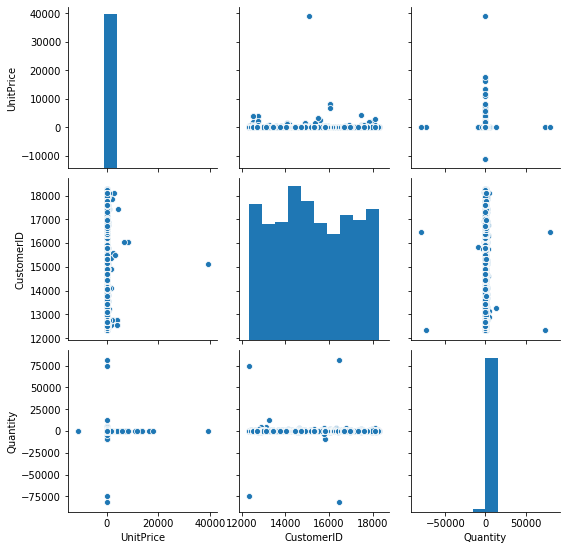

In [14]:
sns.pairplot(df[['UnitPrice','CustomerID','Quantity']])
plt.show()

k. Line chart to show the trend of data - All Numeric/Date Variables 

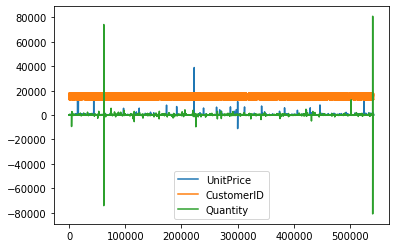

In [15]:
df[['UnitPrice','CustomerID','Quantity']].plot.line()

l. Plot the skewness - All Numeric Variables 

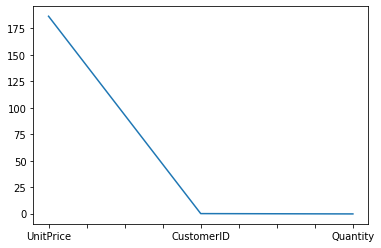

In [17]:
df[['UnitPrice','CustomerID','Quantity']].skew().plot()

### 2. Check for missing values in all columns and replace them with the appropriate metric (Mean/Median/Mode)

In [268]:
df.isnull().sum().sort_values(ascending=False)

CustomerID     135080
Description      1454
Country             0
UnitPrice           0
InvoiceDate         0
Quantity            0
StockCode           0
InvoiceNo           0
dtype: int64

In [269]:
mean_value = round(df['CustomerID'].mean(),2)
df['CustomerID'] = df['CustomerID'].fillna(mean_value)
df['CustomerID'] = df['CustomerID'].astype(int)

In [270]:
mode_value = df['Description'].mode()
df['Description'] = df['Description'].fillna(mode_value)[1]

In [271]:
df.isnull().sum().sort_values()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

### 3. Remove duplicate rows 

In [272]:
df.shape

(541909, 8)

In [273]:
df.drop_duplicates(inplace=True)
df.shape

(536639, 8)

### 4. Remove rows which have negative values in Quantity column 

In [274]:
df['Quantity'].min()

-80995

In [275]:
df = df.drop(df[df['Quantity'] < 0].index)

In [276]:
df['Quantity'].min()

1

### 5. Add the columns - Month, Day and Hour for the invoice 

In [277]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 526052 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    526052 non-null  object 
 1   StockCode    526052 non-null  object 
 2   Description  526052 non-null  object 
 3   Quantity     526052 non-null  int64  
 4   InvoiceDate  526052 non-null  object 
 5   UnitPrice    526052 non-null  float64
 6   CustomerID   526052 non-null  int32  
 7   Country      526052 non-null  object 
dtypes: float64(1), int32(1), int64(1), object(5)
memory usage: 34.1+ MB


In [278]:
df['InvoiceDate']= pd.to_datetime(df['InvoiceDate'])

In [279]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 526052 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    526052 non-null  object        
 1   StockCode    526052 non-null  object        
 2   Description  526052 non-null  object        
 3   Quantity     526052 non-null  int64         
 4   InvoiceDate  526052 non-null  datetime64[ns]
 5   UnitPrice    526052 non-null  float64       
 6   CustomerID   526052 non-null  int32         
 7   Country      526052 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(4)
memory usage: 34.1+ MB


In [280]:
import datetime as dt
df['Month_Year'] = df['InvoiceDate'].dt.month_name().str.slice(0,3)+"_"+df['InvoiceDate'].dt.year.astype(str)
df['Day'] = df['InvoiceDate'].dt.day_name().str.slice(0,3)
df['Hour'] = df['InvoiceDate'].dt.hour

In [281]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month_Year,Day,Hour
541904,581587,22613,WHITE METAL LANTERN,12,2011-12-09 12:50:00,0.85,12680,France,Dec_2011,Fri,12
541905,581587,22899,WHITE METAL LANTERN,6,2011-12-09 12:50:00,2.10,12680,France,Dec_2011,Fri,12
541906,581587,23254,WHITE METAL LANTERN,4,2011-12-09 12:50:00,4.15,12680,France,Dec_2011,Fri,12
541907,581587,23255,WHITE METAL LANTERN,4,2011-12-09 12:50:00,4.15,12680,France,Dec_2011,Fri,12
541908,581587,22138,WHITE METAL LANTERN,3,2011-12-09 12:50:00,4.95,12680,France,Dec_2011,Fri,12


### 6. How many orders made by the customers? 

In [282]:
print("Total number of orders made by all customers: ",df['Quantity'].sum())

Total number of orders made by all customers:  5644716


In [283]:
print("Total number of orders made by each customer: ")
df.groupby(['CustomerID'])['Quantity'].sum().sort_values(ascending=False)

Total number of orders made by each customer: 


CustomerID
15287    479566
14646    197491
16446     80997
14911     80490
12415     77670
          ...  
15802         1
16742         1
17846         1
17956         1
15823         1
Name: Quantity, Length: 4339, dtype: int64

7. TOP 5 customers with higher number of orders 

In [284]:
df.groupby(['CustomerID'])['Quantity'].sum().sort_values(ascending=False).head(5)

CustomerID
15287    479566
14646    197491
16446     80997
14911     80490
12415     77670
Name: Quantity, dtype: int64

8. How much money spent by the customers? 

In [285]:
df['Money_Spent'] = df['Quantity'] * df['UnitPrice']
df['Money_Spent'] = df['Money_Spent'].astype(float)
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month_Year,Day,Hour,Money_Spent
0,536365,85123A,WHITE METAL LANTERN,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,Dec_2010,Wed,8,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,Dec_2010,Wed,8,20.34
2,536365,84406B,WHITE METAL LANTERN,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,Dec_2010,Wed,8,22.00
3,536365,84029G,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,Dec_2010,Wed,8,20.34
4,536365,84029E,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,Dec_2010,Wed,8,20.34
5,536365,22752,WHITE METAL LANTERN,2,2010-12-01 08:26:00,7.65,17850,United Kingdom,Dec_2010,Wed,8,15.30
6,536365,21730,WHITE METAL LANTERN,6,2010-12-01 08:26:00,4.25,17850,United Kingdom,Dec_2010,Wed,8,25.50
7,536366,22633,WHITE METAL LANTERN,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,Dec_2010,Wed,8,11.10
8,536366,22632,WHITE METAL LANTERN,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,Dec_2010,Wed,8,11.10
9,536367,84879,WHITE METAL LANTERN,32,2010-12-01 08:34:00,1.69,13047,United Kingdom,Dec_2010,Wed,8,54.08


In [287]:
print("Total Money Spent by all Customers",df['Money_Spent'].sum())

Total Money Spent by all Customers 10619434.834000003


9. TOP 5 customers with highest money spent 

In [288]:
df['Money_Spent'].sort_values(ascending=False).head(5)

540421    168469.60
61619      77183.60
222680     38970.00
15017      13541.33
299982     11062.06
Name: Money_Spent, dtype: float64

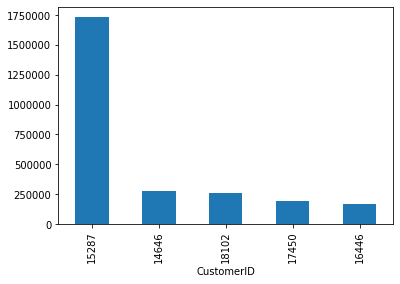

In [289]:
df.groupby(['CustomerID'])['Money_Spent'].sum().sort_values(ascending=False).head(5).plot.bar()

10. How many orders per month? 

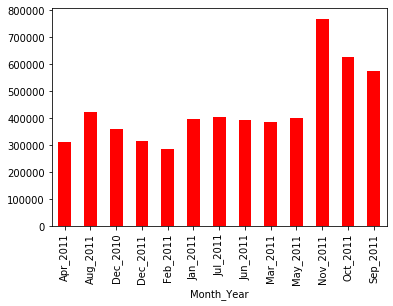

In [295]:
df.groupby(['Month_Year'])['Quantity'].sum().plot.bar(color='red')

11. How many orders per day? 

In [300]:
df.groupby(['Day'])['Quantity'].sum()

Day
Fri     919420
Mon     878575
Sun     465511
Thu    1227204
Tue    1120211
Wed    1033795
Name: Quantity, dtype: int64

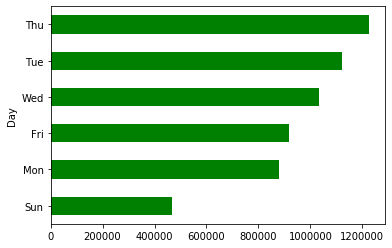

In [310]:
df.groupby(['Day'])['Quantity'].sum().sort_values(ascending=True).plot.barh(color='green')

12. How many orders per hour? 

In [305]:
df.groupby(['Hour'])['Quantity'].sum()

Hour
6          1
7      15370
8     158689
9     521680
10    818775
11    674508
12    851044
13    708133
14    604444
15    649906
16    337749
17    194786
18     67194
19     32929
20      9508
Name: Quantity, dtype: int64

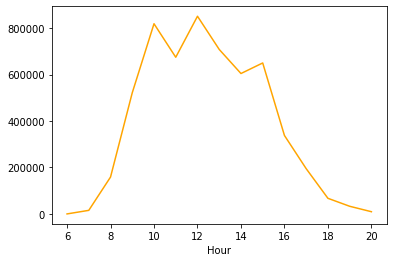

In [306]:
df.groupby(['Hour'])['Quantity'].sum().plot.line(color='orange')

13. How many orders for each country? 

In [318]:
df.groupby(['Country'])['Quantity'].sum().sort_values(ascending=False)

Country
United Kingdom          4718026
Netherlands              200937
EIRE                     147281
Germany                  119156
France                   112061
Australia                 84199
Sweden                    36078
Switzerland               30618
Spain                     27944
Japan                     26016
Belgium                   23237
Norway                    19338
Portugal                  16231
Finland                   10704
Channel Islands            9485
Denmark                    8235
Italy                      8112
Cyprus                     6340
Singapore                  5241
Austria                    4881
Hong Kong                  4713
Israel                     4406
Poland                     3684
Unspecified                3295
Canada                     2763
Iceland                    2458
USA                        2458
Greece                     1557
United Arab Emirates        982
Malta                       970
Czech Republic              671


14. Orders trend across months 

<function matplotlib.pyplot.show(*args, **kw)>

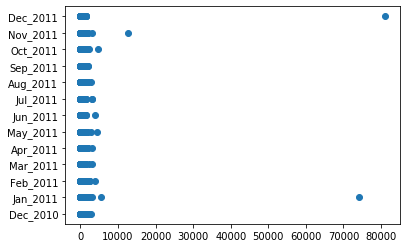

In [362]:
df.groupby(['Month_Year'])['Quantity'].sum().sort_values(ascending=False)
plt.scatter(y=df['Month_Year'],x=df['Quantity'])
plt.show

15. How much money spent by each country? 

In [337]:
df.groupby(['Country'])['Money_Spent'].sum().astype(int).sort_values(ascending=False)

Country
United Kingdom          8979068
Netherlands              285446
EIRE                     283140
Germany                  228678
France                   209625
Australia                138453
Spain                     61558
Switzerland               57067
Belgium                   41196
Sweden                    38367
Japan                     37416
Norway                    36165
Portugal                  33683
Finland                   22546
Singapore                 21279
Channel Islands           20440
Denmark                   18955
Italy                     17483
Hong Kong                 15483
Cyprus                    13502
Austria                   10198
Israel                     8129
Poland                     7334
Greece                     4760
Unspecified                4740
Iceland                    4309
Canada                     3666
USA                        3580
Malta                      2725
United Arab Emirates       1902
Lebanon                    1693
